In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_iris

init_dataset = load_iris()

species = {0: 'Iris setosa', 1: 'Iris versicolor', 2: 'Iris virginica'}

init_dataset_df = pd.DataFrame(load_iris().data, columns=init_dataset.feature_names)
init_dataset_df['species'] = init_dataset.target
init_dataset_df['species'] = init_dataset_df['species'].map(lambda x: init_dataset.target_names[x])

init_dataset_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
from sklearn.preprocessing import StandardScaler

x = init_dataset_df.iloc[:, :-1]
y = init_dataset_df.iloc[:, -1]

scaler = StandardScaler()
std_x = scaler.fit_transform(x)

std_x_df = pd.DataFrame(data=std_x, columns=init_dataset.feature_names)
std_x_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=(std_x.shape[1] - 1))

pc = pca.fit_transform(std_x)
variances = pca.explained_variance_ratio_
print(variances)

df_pc = pd.DataFrame(data=pc, columns=[f"PC-{i+1}" for i in range(x.shape[1] - 1)])
df_pc

[0.72962445 0.22850762 0.03668922]


,PC-1,PC-2,PC-3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738
...,...,...,...
145,1.870503,0.386966,0.256274
146,1.564580,-0.896687,-0.026371
147,1.521170,0.269069,0.180178
148,1.372788,1.011254,0.933395


In [5]:
reduced_pc = pc[:,:-1]
reduced_pc_df = pd.DataFrame(data=reduced_pc, columns=[f"PC-{i+1}" for i in range(x.shape[1] - 2)])

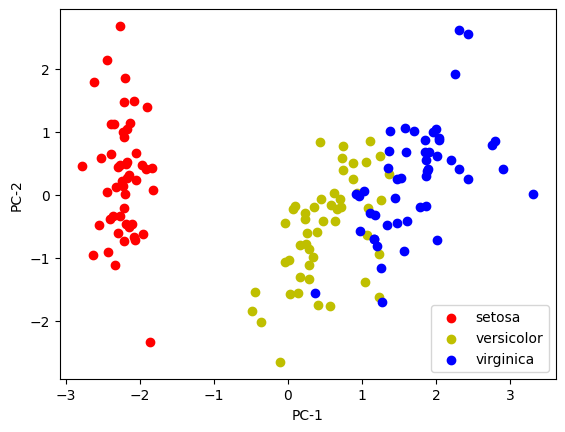

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

axs = plt.axes()

for i in range(df_pc.shape[0]):
    color = 'r' if y[i] == "setosa" else 'b' if y[i] == "virginica" else 'y'
    plt.scatter(df_pc['PC-1'][i], df_pc['PC-2'][i], label=y[i], color=color)

plt.legend()
handles, labels = axs.get_legend_handles_labels()
legends = dict(zip(labels, handles))
plt.legend(legends.values(), legends.keys())

plt.xlabel('PC-1') 
plt.ylabel('PC-2')

plt.show()

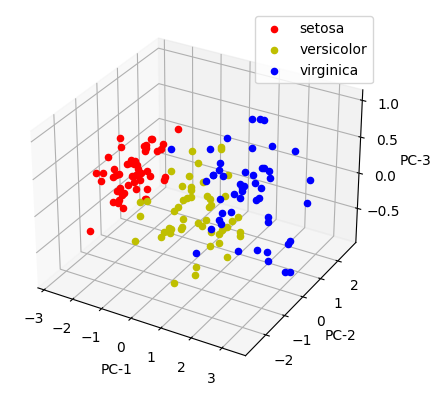

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure
axs = plt.axes(projection="3d")

for i in range(df_pc.shape[0]):
    color = 'r' if y[i] == "setosa" else 'b' if y[i] == "virginica" else 'y'
    axs.scatter(df_pc['PC-1'][i], df_pc['PC-2'][i], df_pc['PC-3'][i], label=y[i], color=color)

axs.legend()
handles, labels = axs.get_legend_handles_labels()
legends = dict(zip(labels, handles))
axs.legend(legends.values(), legends.keys())

axs.set_xlabel('PC-1')
axs.set_ylabel('PC-2')
axs.set_zlabel('PC-3')

plt.show()